In [4]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Academics/3rd Year/5th Sem/Academic Related Docs/Junaid's Intership Tasks/Task 03/customer_data.csv")

df.head()


,Customer ID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,16,81
2,3,20,17,6
3,4,23,18,77
4,5,31,30,40


In [6]:

print("Shape of dataset:", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

print("\nSummary stats:")
print(df.describe())


Shape of dataset: (10, 4)

Data types:
Customer ID               int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

Missing values:
Customer ID               0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate rows: 0

Summary stats:
       Customer ID        Age  Annual Income (k$)  Spending Score (1-100)
count     10.00000  10.000000            10.00000               10.000000
mean       5.50000  27.400000            30.80000               49.400000
std        3.02765   8.382521            16.47085               35.094159
min        1.00000  19.000000            15.00000                3.000000
25%        3.25000  21.250000            17.25000               14.250000
50%        5.50000  24.000000            26.00000               56.000000
75%        7.75000  32.500000            38.75000               76.750000
max       10.00000  45.000000            60.00000 

### Step 01: Load and Explore Dataset

In this step, I loaded the `customer_data.csv` file using pandas and checked the basic details:
- Verified the dataset shape and column names
- Confirmed there were no missing or duplicate rows
- Got a sense of the range for age, income, and spending score

This step helps ensure the data is clean and ready for clustering.


In [7]:
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.056290,-1.011160,-0.312376
1,-0.804793,-0.947162,0.949142
2,-0.930542,-0.883165,-1.303568
3,-0.553295,-0.819167,0.828997
4,0.452696,-0.051198,-0.282340


### Step 02: Standardize the Data

I standardized the numerical features using `StandardScaler` so that each one has equal importance during clustering.

This avoids biasing the algorithm toward higher-value features like income.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

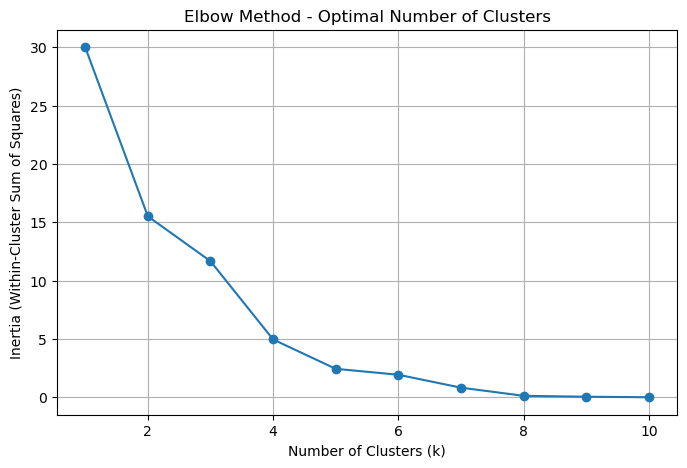

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

### Step 03: Find Optimal Clusters using Elbow Method

I used the Elbow Method to determine the best number of clusters (k) for customer segmentation.

It works by plotting the model’s inertia (how tightly points are grouped) for different values of k.

The “elbow point” shows the best trade-off between accuracy and simplicity.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


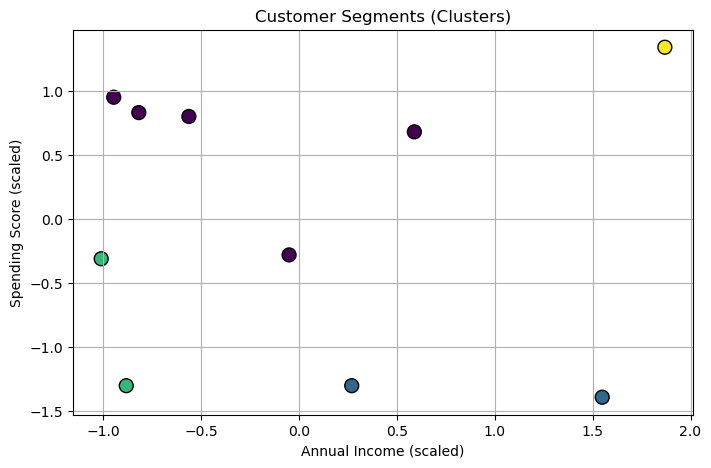

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

df['Cluster'] = cluster_labels

plt.figure(figsize=(8, 5))
plt.scatter(scaled_df['Annual Income (k$)'], scaled_df['Spending Score (1-100)'],
            c=cluster_labels, cmap='viridis', s=100, edgecolor='black')
plt.title("Customer Segments (Clusters)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()


### Step 04: Apply KMeans Clustering

I used KMeans to divide customers into 4 distinct clusters.

Each dot in the scatter plot represents a customer, colored by their group. This helps in spotting patterns in spending and income behavior.


In [10]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Average characteristics per cluster:\n")
print(cluster_summary)


Average characteristics per cluster:

          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        24.4                25.2                    69.2
1        34.0                45.0                     4.5
2        19.5                16.0                    22.5
3        45.0                60.0                    94.0


### Step 05: Analyze and Interpret the Clusters

I calculated the average values for each cluster to understand them better.

This helped me see which customer groups are high-income, high-spenders, or budget-conscious. It gives a real-world meaning to each cluster and helps businesses target them better.


### Step 06: Summary and Conclusion

In this task, I performed customer segmentation using KMeans clustering.

Here’s what I did:

- Loaded and cleaned the dataset
- Scaled features like Age, Income, and Spending Score
- Used the Elbow Method to find the best number of clusters
- Applied KMeans to segment customers
- Analyzed each cluster to understand customer behavior

This kind of analysis can help businesses personalize marketing and improve customer experience.
